# ÖRNEK KODLAR

Ayrık-zamanlı Fourier dönüşümü (DTFT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook
from scipy.fftpack import fft , ifft
from scipy import signal 

<IPython.core.display.Javascript object>


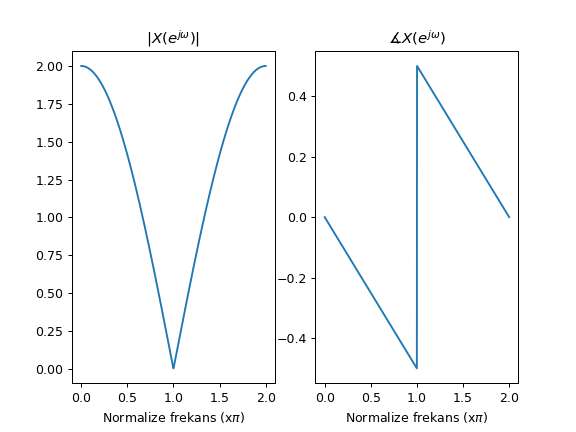

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

In [3]:

w=np.linspace(0,2*np.pi,1000)
X_abs=np.abs(2*np.cos(w/2))
# yukarıda exp li kısmı yassanda yazmasanda olur.
X_phase=np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])
plt.subplot(121)
plt.plot(w/np.pi,X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.subplot(122)
plt.plot(w/np.pi,X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

Ayrık Fourier dönüşümü (DFT)

In [115]:
def dirac (n):
    if n==0:
        return 1
    else:
        return 0 

<IPython.core.display.Javascript object>


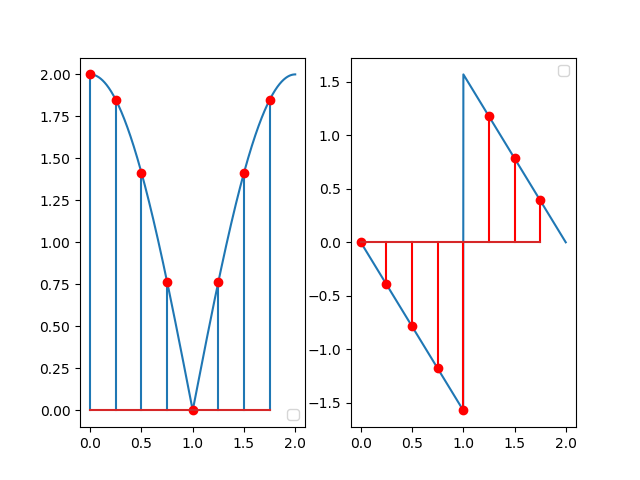

C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
No handles with labels found to put in legend.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
No handles with labels found to put in legend.


In [128]:
N=8
X_k=np.zeros([N],dtype=complex)
for k in range (N):
    for n in range (N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,markerfmt='ro')
plt.legend()
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase)
plt.stem(w_discrete/np.pi,X_k_phase,'r-',markerfmt='ro')
plt.legend()

Hızlı Fourier Dönüşümü (FFT)

<IPython.core.display.Javascript object>


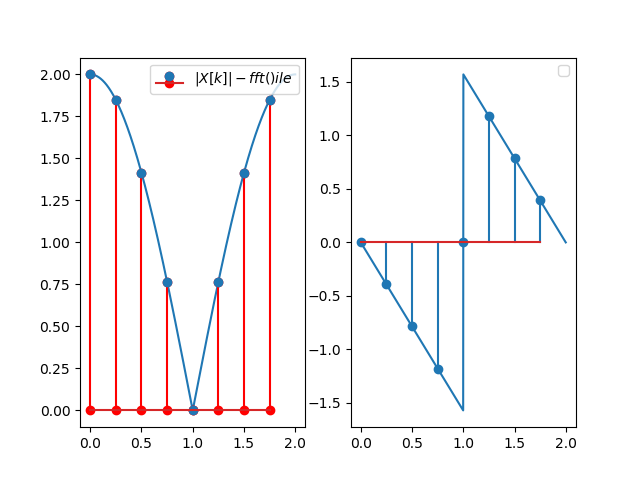

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
No handles with labels found to put in legend.


In [82]:
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
##grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase)
plt.stem(w_discrete/np.pi,phase_fft_X)
plt.legend(loc='upper right')

Frekansta örnekleme →Zamanda periyodiklik ilişkisi

<IPython.core.display.Javascript object>


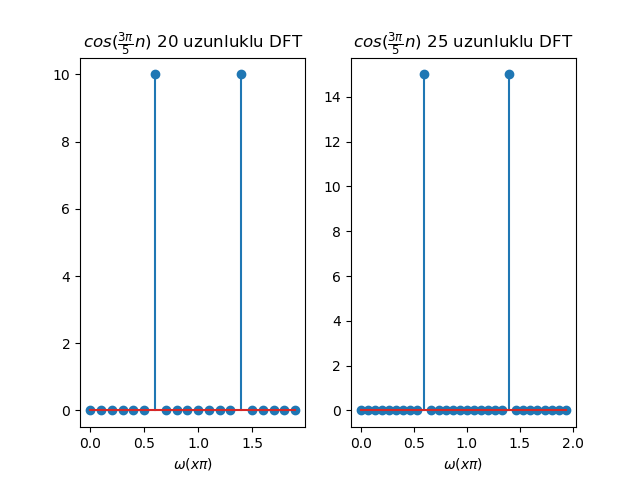

C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

In [130]:
#20 uzunluklu versiyonu
n1=np.arange(0,20)
X1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(X1))
w_disc_1=n1*2*np.pi/len(n1)

plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')


#25 uzunluklu versiyon
n2=np.arange(0,30)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2) #0-2pi arası 2pi/25 adımlı vektör (2pi
#noktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4

X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')


C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instan

Text(0.5, 23.52222222222222, '$\\omega (\\times \\pi)$')

BASAMAK, DÜRTÜ İŞARETLERİNİN KOLAYCA
OLUŞTURULMASI

In [94]:
n=np.arange(-20,21)
#yol1
u_n=np.array([0 if i<0 else 1 for i in n ])
print(u_n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [96]:
# 2. yol 
u_n =[]
for i in n :
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

𝑢[𝑛 − 3]:

<IPython.core.display.Javascript object>


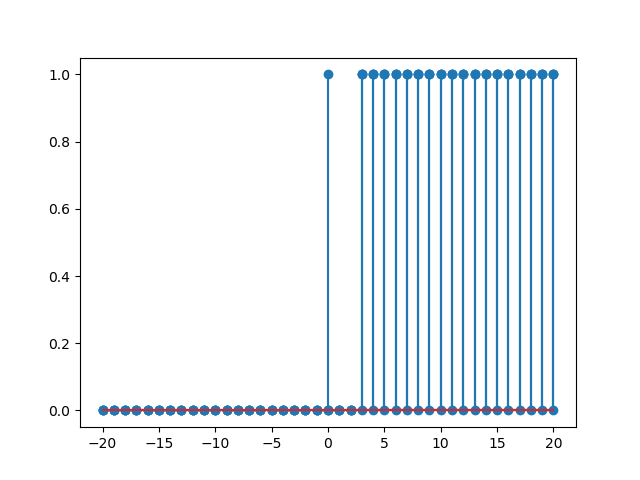

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
n=np.arange(-20,21)
u_n_3=np.array([0 if i<3 else 1 for i in n])
plt.stem(n,u_n_3)
plt.show()

𝛿 [𝑛]:

<IPython.core.display.Javascript object>


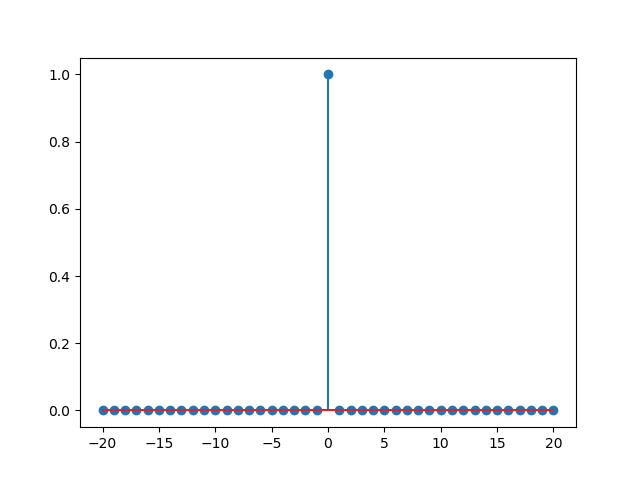

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [105]:
n= np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])

plt.stem(n,dirac_n)
plt.show()

# ODEV-3

# PROBLEM-1

# A)

$\delta[n]$  fonksiyonun fourier dönüşümü 1 dir.$\delta[n-1]$ fonksiyonun ise fourier dönüşümü gene 1 getirir fakat zamanda 1 birim sağa ötelenmeden dolayı $e^{(-j*w)}$ gibi bir kat sayı ile çarpılır
$H(e^{(j*w)})=1-e^{(-j*w)}$


# $H(e^{(j*w)})=1-e^{(-j*w)}$ sinyali aynı zamanda aşağıdaki gibi de yazılabilir:
# $= e^{(-j*w/2)} *e^{(+j*w/2)} $ - $e^{(-j*w/2)}*e^{(-j*w/2)} $

# $= 2* j *e^{(-j*w/2)} [\frac{e^{(+j*w/2)}-e^{(-j*w/2)}} {2*j}]$
# $ 2* e^{j*(-w/2+\pi/2)}* sin(\omega/2)$

1000


Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

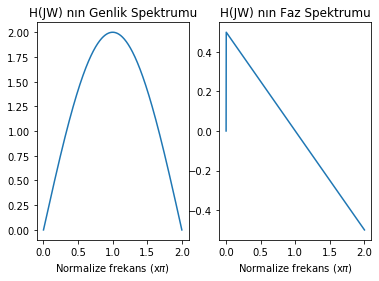

In [47]:
w_cont=np.linspace(0,2*np.pi,1000) #0 dan 2*pi ye 1000 nokta 
print(len(w_cont))# toplam 1000 nokta odluğunu göstermek için 

x=1-np.exp(-1j*w_cont)# el ile hesaplanan denklem..
x_2=2*np.exp(1j*(-w_cont/2+np.pi/2))*np.sin(w_cont/2)

# x_2_amp=np.abs(x_2) x_2 denklemi ile de fonksiyon çizdirildiğinde aynı  sonucu verir...
# x_2_phase=np.angle(x_2)

x_amp=np.abs(x)
x_phase=np.angle(x)
##grafik çizimi
plt.figure()
plt.subplot(121)

plt.plot(w_cont/np.pi,x_amp)
plt.xlabel('Normalize frekans (x$\pi$)')
plt.title("H(JW) nın Genlik Spektrumu")


plt.subplot(1,2,2)
plt.plot(w_cont/np.pi,x_phase/np.pi)
plt.title("H(JW) nın Faz Spektrumu")
plt.xlabel('Normalize frekans (x$\pi$)')





# B)

Yapılan araştırmalarda genlik sinyalinin bir periyot boyunca çift fonksiyon olması,faz sinyalinin ise tek fonksiyon olması (y ye göre simetrik) ve  $H(e^{(j*w)})$ 'nın 2 $ \pi$  periyodunun olması alçak geçiren filtre özelliği olduğu görülmüştür.Elde edilen grafikler yukarıdaki bilgilere uyduğu için $ Alçak Geçiren Filtre $ Karakteristliği gösterir denilebilir 

# C) 

16
[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
16


C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
C:\anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

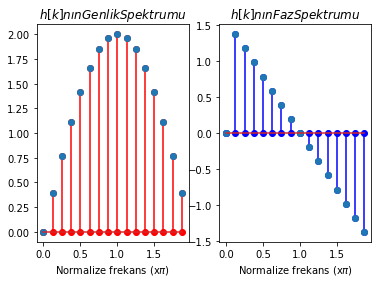

In [40]:
w_cont=np.linspace(0,2*np.pi,16)

print(len(w_cont))
x=np.zeros(len(w_cont))
x[0]=1 # h[n] in ilk iki elamanın el ile verdik 
x[1]=-1
print(x)
fft_X=fft(x,16)# 16 noktalı olacak şekilde fouier dönüşüm fonksiyonunu kullandık
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
##grafik çizimi
plt.figure()
plt.subplot(121)
w_discrete=np.arange(0,16)*(2*np.pi/16)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.title("$h[k] nın Genlik Spektrumu$")
print(len(w_discrete))


plt.subplot(1,2,2)
plt.stem(w_discrete/np.pi,phase_fft_X,'bo-')
plt.title("$h[k] nın Faz Spektrumu$")
plt.xlabel('Normalize frekans (x$\pi$)')

# grafikler 0-2pi aralığında 16 noktadan oluşacak şekilde çizdirmiştir

# PROBLEM-2

[ 0.          1.57079633 -0.         -1.57079633  0.          1.57079633
  0.         -1.57079633]
[0.00000000e+00 2.76191153e-07 0.00000000e+00 4.99999724e-01
 0.00000000e+00 4.99999724e-01 0.00000000e+00 2.76191153e-07]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

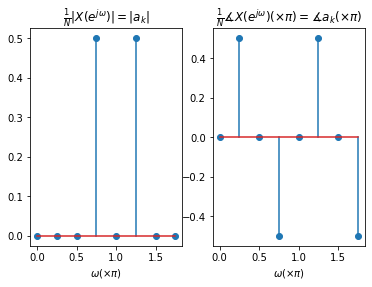

In [25]:
x=np.array([0,0.707106,-1,0.707106,0,-0.707106,1,-0.707106])
N=len(x)
n=np.arange(0,8)
w_discrete=n*2*np.pi/N

X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)

print(X_phase)
print(X_abs)

plt.subplot(121)
plt.stem(w_discrete/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_discrete/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')

Fourier serisi açılımı şeklinde yazılabilecek her bir sinyal aşağıdaki gibi ifade edilebilir:
 $a_n* e^{(j*w*n)}$ ,n ise -sonsuz ve +sonsuz arasında değerler alır.
 çizdirilen genlik grafiğine bakılacak olursa $a_3$ ve $a_5$ katsayılarının genlikleri sıfırdan farklıdır.Sağdaki grafikten de fazlarına bakarak elde edilmek istenen sinyal şöyle yazılabilir
# $x[n]= a_3*e{^(j*0.75*pi*n)}+ a_5*e^{(j*1.25*pi*n)}$
# $a_3=0.5*e^{(-j*pi/2)}    a_5=0.5*e^{(+j*pi/2)}$
# $x[n]=0.5*e^{(-j*pi/2)} * e^{(j*o.75*pi*n)}+0.5*e^{(+j*pi/2)}*e^{(j*1.25*pi*n)}$
# $e^{(j*1.25*pi*n)}= e^{(j*2*pi*n- j*0.25*n*pi)}=e^{(-j*0.75*pi*n)}$
# $x[n]=0.5*e^{(-j*pi/2)}*e^{(j*o.75*pi*n)}+0.5*e^{(+j*pi/2)}*e^{(-j*0.75*pi*n)}$

# $x[n]=\mathcal{1}\cos(0.75 \pi n - \pi /2)$

# Sonuc olarak :$ A=1 , w_0=0.75 \pi , \phi = - \pi /2$ 

# PROBLEM-3

In [49]:
w_cont=np.linspace(0,2*np.pi,11)
w_verilen=np.pi/3 # H[J*W] denklemin de w artık değşen değerler almayacak çünkü
# w nın değeri artık sabit.
H=1-np.exp(-1j*w_verilen)
abs_H=np.abs(H)
phase_H=np.angle(H)

print("genlik:")
print(abs_H)
print("faz:")
print(phase_H)


genlik:
0.9999999999999999
faz:
1.0471975511965979


In [50]:
# Cıkış fonksiyonu
n=np.arange(0,11)
y=abs_H*(np.cos(np.pi*n/3+phase_H))
print(len(y))

11


<IPython.core.display.Javascript object>


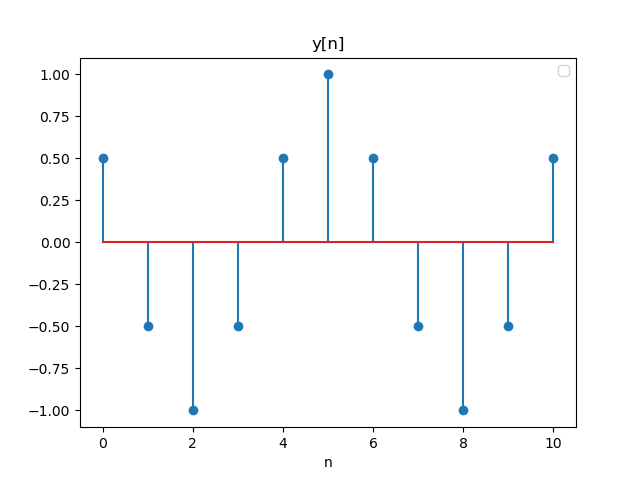

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
No handles with labels found to put in legend.


In [53]:
w_discrete=np.arange(0,10)*(2*np.pi/10)
plt.stem(n,y)
plt.title("y[n]")
plt.xlabel('n')
plt.legend(loc='upper right')

In [33]:
print(y)

[ 0.5 -0.5 -1.  -0.5  0.5  1.   0.5 -0.5 -1.  -0.5  0.5]
